## Notebook 3) Comparable Tram Systems

#### Section 3.1: Introduction

As required I was asked to perform research in order to compare my preexisiting data to other data sourced from outside Ireland. 
Below I outline 3 mayor cities with differing levels of tram/light rail infrastructure, for which I have collected data. 

In [113]:
# Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import dash
from dash import html, dcc

In [47]:
# Supress Warnings
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [48]:
# Install if needed
#pip install dash

### Part 1: Edinburgh Light Rail

#### Section 3.2: Geograpghical Visualisation

In [49]:
# Read GeoJSON file
gdf = gpd.read_file('G6) Edinburgh Tram Stops.geojson')

In [50]:
# Create a scatter map using plotly express
fig = px.scatter_mapbox(gdf, 
                        lat=gdf.geometry.y, 
                        lon=gdf.geometry.x,
                        text=gdf['name'],
                        hover_name=gdf['name'],
                        mapbox_style="carto-positron", 
                        zoom=12)
# Display
fig.update_layout(
    title_text="Edinburgh Tram System",
    width=700,  
    height=500, 
)
fig.show()

#### Section 3.3: No. of Passengers

Source: https://www.gov.uk/government/statistical-data-sets/light-rail-and-tram-statistics-lrt

In [51]:
# Read CSV file (no. of Passengers)
Ed_df = pd.read_csv('DS7) Edinburgh Trams.csv')

# Filter
Ed_df = Ed_df[['Financial year ending March', 'Edinburgh Trams']]
Ed_df = Ed_df[Ed_df['Financial year ending March'] >= 2015]

print(Ed_df)

    Financial year ending March Edinburgh Trams
31                         2015             4.1
32                         2016             5.3
33                         2017             5.8
34                         2018             6.8
35                         2019             7.5
36                         2020             7.1
37                         2021             0.9
38                         2022             2.8
39                         2023             5.3


In [54]:
# Read CSV file (no. of Passengers)
luas_df = pd.read_csv('DS5) TOA10 - Luas infrastructure.csv')
print(luas_df['Statistic Label'].unique())

# Filter
luas_df = luas_df[luas_df['Statistic Label'] == 'Passengers carried']
columns_to_keep = ['Year', 'Luas Line', 'VALUE']
luas_df = luas_df[columns_to_keep]

print(luas_df)

['Length of line' 'Journey time' 'Trams' 'Length of tram'
 'Capacity of tram' 'Passengers carried' 'Vehicle kilometres'
 'Passenger kilometres' 'Average length of journey'
 'Average number of stops per passenger'
 'Timeliness (% services to timetable)']
    Year   Luas Line     VALUE
50  2018    Red line  21837268
51  2018  Green line  19999700
52  2019    Red line  24045744
53  2019  Green line  24301487
54  2020    Red line   9727187
55  2020  Green line   9448869
56  2021    Red line  10040293
57  2021  Green line   9441025
58  2022    Red line  20275075
59  2022  Green line  18392800


In [55]:
# Group by 'Year' and sum the values
luas_df['VALUE'] = pd.to_numeric(luas_df['VALUE'], errors='coerce')
luas_df = luas_df.groupby('Year')['VALUE'].sum().reset_index()

# Display
print(luas_df)

   Year     VALUE
0  2018  41836968
1  2019  48347231
2  2020  19176056
3  2021  19481318
4  2022  38667875


In [56]:
# Convert
luas_df['VALUE'] = (luas_df['VALUE'] / 1000000).round(1)

# Display
print(luas_df)

   Year  VALUE
0  2018   41.8
1  2019   48.3
2  2020   19.2
3  2021   19.5
4  2022   38.7


In [57]:
# Merge
df = pd.merge(luas_df, Ed_df, left_on='Year', right_on='Financial year ending March', how='left')

# Drop column
df = df.drop('Financial year ending March', axis=1)
df.rename(columns={'VALUE': 'Dublin', 'Edinburgh Trams': 'Edinburgh'}, inplace=True)

# Display the combined DataFrame
print(df)

   Year  Dublin Edinburgh
0  2018    41.8       6.8
1  2019    48.3       7.5
2  2020    19.2       7.1
3  2021    19.5       0.9
4  2022    38.7       2.8


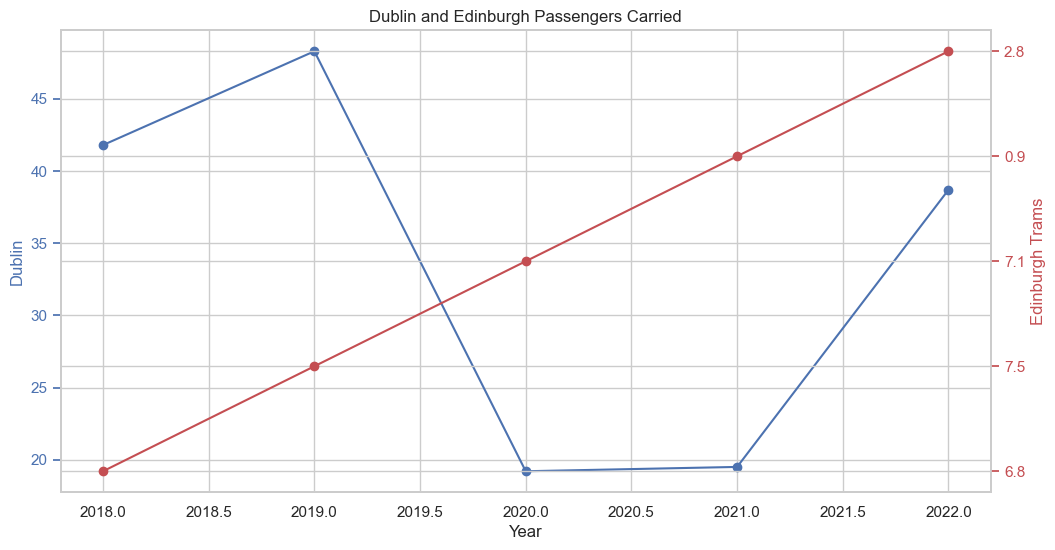

In [58]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first axis
ax1.plot(df['Year'], df['Dublin'], label='Dublin', marker='o', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Dublin', color='b')
ax1.tick_params('y', colors='b')

# Create a twin Axes
ax2 = ax1.twinx()

# Plot the second axis
ax2.plot(df['Year'], df['Edinburgh'], label='Edinburgh Trams', marker='o', color='r')
ax2.set_ylabel('Edinburgh Trams', color='r')
ax2.tick_params('y', colors='r')

# Adding labels and title
plt.title('Dublin and Edinburgh Passengers Carried')
plt.show()

#### Section 3.4: Revenue

In [59]:
# Read CSV file (no. of Passengers)
df = pd.read_csv('DS8) Edinburgh Revenue.csv')

In [60]:
# Keep only the relevant columns
df = df[['Financial year ending March', 'Edinburgh Trams']]
df = df[df['Financial year ending March'] >= 2015]

# Display
print(df)

    Financial year ending March Edinburgh Trams
31                       2015.0             7.0
32                       2016.0             9.6
33                       2017.0            11.2
34                       2018.0            13.2
35                       2019.0            15.7
36                       2020.0            15.9
37                       2021.0             2.1
38                       2022.0             7.3
39                       2023.0            15.5


#### Section 3.5: Passenger Kilometres

In [61]:
# Read CSV file (no. of Passengers)
df = pd.read_csv('DS9) Edinburgh Kilometres.csv')

In [62]:
# Keep only the relevant columns
df = df[['Financial year ending March', 'Edinburgh Trams']]
df = df[df['Financial year ending March'] >= 2015]

# Display
print(df)

    Financial year ending March Edinburgh Trams
31                       2015.0            33.0
32                       2016.0            42.7
33                       2017.0            46.7
34                       2018.0            54.7
35                       2019.0            60.1
36                       2020.0            57.3
37                       2021.0             7.3
38                       2022.0            25.6
39                       2023.0            42.9


After researching the Edinburgh light rail tramline, I found it incredibly difficult to find detailed, granular data and statisitics I would need to compare to Dublin's Luas lines. However, I did take away some key points from my research. 

- Firstly, Edinburgh's tram system is less focused on worker commutes and more focused on tourism and events. Directly linking to the airport and Murrayfield stadium. Dublin's Luas system could potentially learn from this and link to major hubs like Dublin Airport, Aviva Stadium, Croke Park etc... 
- This may not be evident on the choropleth map earlier as these hubs may not contain a huge number of residents.

### Part 2: Melbourne

#### Section 3.6: Introduction

After finding a disapointing lack of data on the Edinburgh tram system I decided to turn my attention to alternative tram systems. I soon came across the Melbourne tram system operated by VIC who place a huge emphasis on open data. 

Whilst this tram system is a lot larger than the Luas system, we can really look at this and visualise the potential of the Luas. 

Source: https://www.data.vic.gov.au/

License: https://creativecommons.org/licenses/by/4.0/

#### Section 3.7: Geographical Visualisation

In [63]:
# Read GeoJSON file
gdf = gpd.read_file('G7) Melbounre tram.geojson')

In [64]:
#gdf

In [65]:
# Extracting centroids from MultiPolygon geometries
gdf['centroid'] = gdf['geometry'].centroid

fig = px.scatter_mapbox(gdf, 
                        lat=gdf['centroid'].y, 
                        lon=gdf['centroid'].x,
                        hover_name='name',
                        mapbox_style="carto-positron",
                        zoom=12,
                        title="Melbourne Tram System")
fig.update_layout(
    width=600,  
    height=600, 
)

fig.show()

C:\Users\cathalnugent\AppData\Local\Temp\ipykernel_8516\1845400511.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




I can plot the above map as lines but it takes up a lot of my computer's processing power. This dotted map gives us a good visualisation and does not use too much processing power. 

#### Section 3.8: Passenger Numbers by Day of the Week

In [67]:
# Read CSV file (no. of Passengers)
Mel_df = pd.read_csv('DS10) Melbourne Tram Users.csv')

print(Mel_df.head())
print(Mel_df['Pax_daily'].sum())
print(Mel_df['Year'].unique())
print(Mel_df['Mode'].unique())
print(Mel_df['Day_of_week'].unique())

   _id  Year  Month Month_name Day_of_week                Day_type  Mode  \
0    5  2018      1        Jan      Friday  School Holiday Weekday  Tram   
1   10  2018      1        Jan      Monday          Normal Weekday  Tram   
2   15  2018      1        Jan      Monday  School Holiday Weekday  Tram   
3   20  2018      1        Jan    Saturday                 Weekend  Tram   
4   25  2018      1        Jan      Sunday                 Weekend  Tram   

   Pax_daily  
0     529250  
1     534800  
2     562150  
3     393050  
4     325900  
227616000
[2018 2019 2020 2021 2022 2023]
['Tram']
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


In [68]:
day_of_week_counts = Mel_df['Day_of_week'].value_counts()
print(day_of_week_counts)

Monday       95
Thursday     95
Tuesday      94
Wednesday    94
Friday       91
Saturday     66
Sunday       66
Name: Day_of_week, dtype: int64


In [69]:
# Reordering
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Mel_df['Day_of_week'] = pd.Categorical(Mel_df['Day_of_week'], categories=days_order, ordered=True)

# Calculate average passenger number per day of the week
Mel_day = Mel_df.groupby('Day_of_week')['Pax_daily'].mean().reset_index()

# Display the new DataFrame
Mel_day

,Day_of_week,Pax_daily
0,Monday,379535.789474
1,Tuesday,409850.531915
2,Wednesday,424788.829787
3,Thursday,415896.315789
4,Friday,414045.604396
5,Saturday,309140.151515
6,Sunday,235037.121212


In [70]:
# Adding a Percentage Column
total_passengers = Mel_day['Pax_daily'].sum()
Mel_day['Percentage'] = (Mel_day['Pax_daily'] / total_passengers) * 100

print(Mel_day)
print(Mel_day['Percentage'].sum())

  Day_of_week      Pax_daily  Percentage
0      Monday  379535.789474   14.663548
1     Tuesday  409850.531915   15.834773
2   Wednesday  424788.829787   16.411921
3    Thursday  415896.315789   16.068355
4      Friday  414045.604396   15.996852
5    Saturday  309140.151515   11.943779
6      Sunday  235037.121212    9.080773
99.99999999999999


Now I will get similar statistics for Dublin's Luas system

In [72]:
# Read Dublin Data
Dub_df = pd.read_csv('DS11) TOA02 - Average weekly flow of Luas passengers.csv')
Dub_df = Dub_df[Dub_df['Statistic Label'] == 'Average Total Flow']

print(Dub_df.head())
print(Dub_df['Days of Week'].unique())

   STATISTIC     Statistic Label  TLIST(A1)  Year C02639V03196 Days of Week  \
80  TOA02C03  Average Total Flow       2018  2018            -     All days   
81  TOA02C03  Average Total Flow       2018  2018            1       Sunday   
82  TOA02C03  Average Total Flow       2018  2018            2       Monday   
83  TOA02C03  Average Total Flow       2018  2018            3      Tuesday   
84  TOA02C03  Average Total Flow       2018  2018            4    Wednesday   

      UNIT   VALUE  
80  Number  804557  
81  Number   62955  
82  Number  117267  
83  Number  127090  
84  Number  130399  
['All days' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday'
 'Saturday']


In [73]:
# Group by 'Days of Week' and calculate the mean of 'VALUE'
Dub_day = Dub_df.groupby('Days of Week')['VALUE'].mean().reset_index()

# Rename 
Dub_day.columns = ['Day_of_week', 'Average_Passengers']
Dub_day = Dub_day[Dub_day['Day_of_week'] != 'All days']

# Display
#Dub_day

In [74]:
# Assuming 'Dub_day' is your DataFrame
total_passengers = Dub_day['Average_Passengers'].sum()

Dub_day['Percentage'] = (Dub_day['Average_Passengers'] / total_passengers) * 100

print(Dub_day)
print(Dub_day['Percentage'].sum())

  Day_of_week  Average_Passengers  Percentage
1      Friday            110272.8   17.152846
2      Monday             91871.4   14.290523
3    Saturday             74853.0   11.643324
4      Sunday             53082.6    8.256956
5    Thursday            108133.4   16.820064
6     Tuesday            100932.0   15.699892
7   Wednesday            103738.2   16.136394
100.00000000000001


In [75]:
# Merging the DataFrames on 'Day_of_week'
Day_df = pd.merge(Mel_day, Dub_day, on='Day_of_week', how='left')
Day_df.columns = ['Day_of_week', 'Melbourne', 'Melbourne %', 'Dublin','Dublin %']

print(Day_df)

  Day_of_week      Melbourne  Melbourne %    Dublin   Dublin %
0      Monday  379535.789474    14.663548   91871.4  14.290523
1     Tuesday  409850.531915    15.834773  100932.0  15.699892
2   Wednesday  424788.829787    16.411921  103738.2  16.136394
3    Thursday  415896.315789    16.068355  108133.4  16.820064
4      Friday  414045.604396    15.996852  110272.8  17.152846
5    Saturday  309140.151515    11.943779   74853.0  11.643324
6      Sunday  235037.121212     9.080773   53082.6   8.256956


We can also try to normalise the data by dividing by number of kilometres of tramline. Interestingly Dublin has more passengers per km now. 

In [76]:
# Normalizing Melbourne by dividing by 250
#Day_df['Melbourne'] = Day_df['Melbourne'] / 250

# Normalizing Dublin by dividing by 44.5
#Day_df['Dublin'] = Day_df['Dublin'] / 44.5

#print(Day_df)

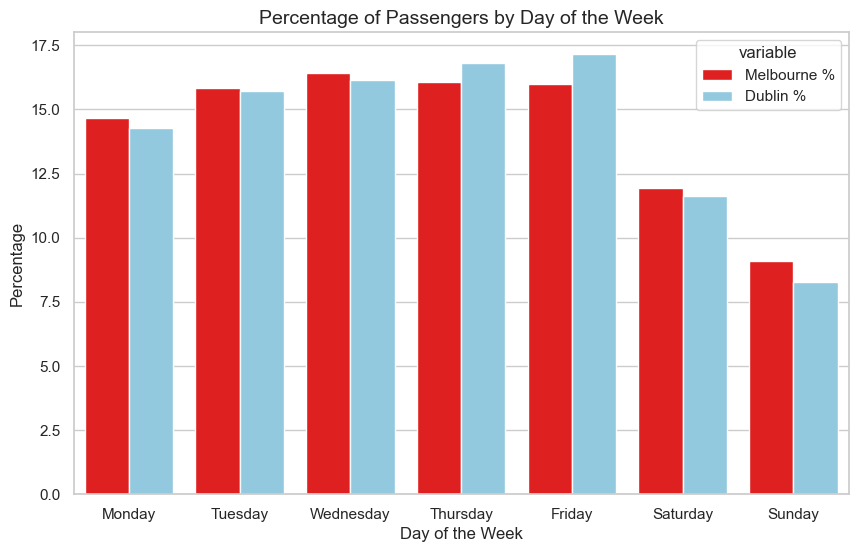

In [77]:
# Set the plotting style
sns.set(style="whitegrid")

# Define a color palette
custom_palette = {'Melbourne %': 'red', 'Dublin %': 'skyblue'}

# Reshape the DataFrame for Seaborn
melted_df = pd.melt(Day_df, id_vars=['Day_of_week'], value_vars=['Melbourne %', 'Dublin %'])

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_week', y='value', hue='variable', data=melted_df, palette=custom_palette)

# Set the title and labels
plt.title('Percentage of Passengers by Day of the Week', size = 14)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage')

# Show the plot
plt.show()

Mann-Whitney Test: 
- Null Hypothesis: There is no significant difference in the average number of passengers between Melbourne and Dublin for each day of the week.
- Alternative Hypothesis: There is a significant difference in the average number of passengers between Melbourne and Dublin for each day of the week.

In [78]:
# Define dfs
melbourne_passengers = Day_df['Melbourne %']
dublin_passengers = Day_df['Dublin %']

# Perform Mann-Whitney U test for each day
for day in Day_df['Day_of_week']:
    _, p_value = mannwhitneyu(melbourne_passengers, dublin_passengers)
    print(f"{day}: p-value = {p_value}")

Monday: p-value = 0.9015151515151516
Tuesday: p-value = 0.9015151515151516
Wednesday: p-value = 0.9015151515151516
Thursday: p-value = 0.9015151515151516
Friday: p-value = 0.9015151515151516
Saturday: p-value = 0.9015151515151516
Sunday: p-value = 0.9015151515151516


The p-values are consistently high across all days of the week, which suggests that there is no significant difference between the Melbourne and Dublin tram lines for each day. The high p-values indicate that we fail to reject the null hypothesis that the distributions are the same. However, it is important to note the small scale of the data. 

#### Section 3.9: Recent Trends in Passenger Numbers

In [80]:
# Read CSV file (no. of Passengers)
Mel_df = pd.read_csv('DS12) Monthly public transport patronage by mode.csv')
#Mel_df

In [81]:
# Grouping by Year and Month and summing up Pax_daily
Mel_Month = Mel_df.groupby(['Year', 'Month'])['Metropolitan tram'].sum().reset_index()
Mel_Month = Mel_Month.rename(columns={'Metropolitan tram': 'Melbourne'})
Mel_Month['Melbourne'] = pd.to_numeric(Mel_Month['Melbourne'].str.replace(',', ''))

# Display 
#print(Mel_Month)
print(Mel_Month['Month'].unique())
print(Mel_Month['Year'].unique())
print(Mel_Month['Melbourne'].sum())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2018 2019 2020 2021 2022 2023]
740560374


In [82]:
Dub_Month = pd.read_csv('D6) TOA11 - Luas Passenger Numbers.csv')

#print(Dub_Month)
print(Dub_Month['Statistic Label'].unique())
print(Dub_Month['C01885V02316'].unique())
print(Dub_Month['Year'].unique())

['Red line' 'Green line' 'All Luas lines']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '-']
[2018 2019 2020 2021 2022]


In [83]:
# Filter & Tidy df
Dub_Month = Dub_Month[(Dub_Month['Statistic Label'] == 'All Luas lines') & 
                      (Dub_Month['C01885V02316'] != '-')]

print(Dub_Month['Statistic Label'].unique())

Dub_Month = Dub_Month[['Year', 'C01885V02316', 'VALUE']]
Dub_Month = Dub_Month.rename(columns={'C01885V02316': 'Month', 'VALUE': 'Dublin'})

#print(Dub_Month.head())
print(Dub_Month['Month'].unique())
print(Dub_Month['Year'].unique())
print(Dub_Month['Month'].unique())

['All Luas lines']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
[2018 2019 2020 2021 2022]
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


In [84]:
# Convert 'Year' and 'Month' columns to the same data type in both dfs
Mel_Month['Year'] = Mel_Month['Year'].astype(str)
Mel_Month['Month'] = Mel_Month['Month'].astype(str)
Dub_Month['Year'] = Dub_Month['Year'].astype(str)
Dub_Month['Month'] = Dub_Month['Month'].astype(str)

# Adjust the format in Melbourne DataFrame
Mel_Month['Month'] = Mel_Month['Month'].apply(lambda x: x.zfill(2))

# Merge Melbourne and Dublin DataFrames
Month_df = pd.merge(Mel_Month, Dub_Month, on=['Year', 'Month'], how='inner')

# Display the merged DataFrame
#print(Month_df)

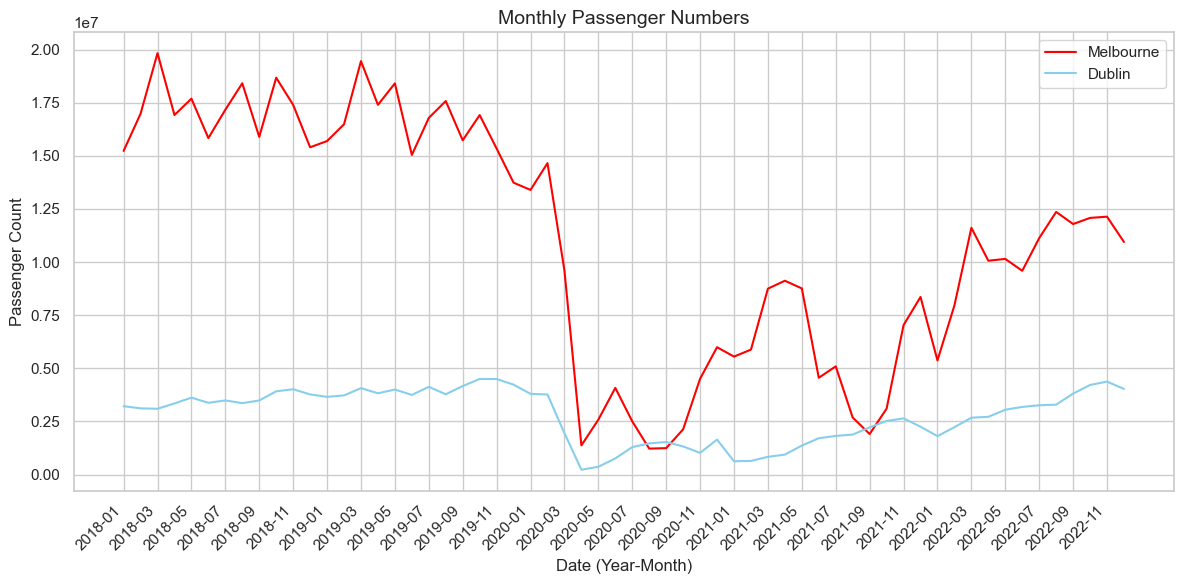

In [85]:
# Plotting 
plt.figure(figsize=(12, 6))
plt.plot(Month_df['Year'].astype(str) + '-' + Month_df['Month'].astype(str), Month_df['Melbourne'], label='Melbourne', color='red')
plt.plot(Month_df['Year'].astype(str) + '-' + Month_df['Month'].astype(str), Month_df['Dublin'], label='Dublin',color='skyblue')

# Adding labels and title
plt.xlabel('Date (Year-Month)')
plt.ylabel('Passenger Count')
plt.title('Monthly Passenger Numbers', size = 14)
plt.legend()

# Customise the axis
ticks = range(0, len(Month_df), 2)
plt.xticks(ticks, Month_df['Year'].astype(str).iloc[ticks] 
           + '-' + Month_df['Month'].astype(str).iloc[ticks], rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

This is a good visualisation but it doesnt take the differing scales into account. So I will replot with differnet scales for each of our datasets. 

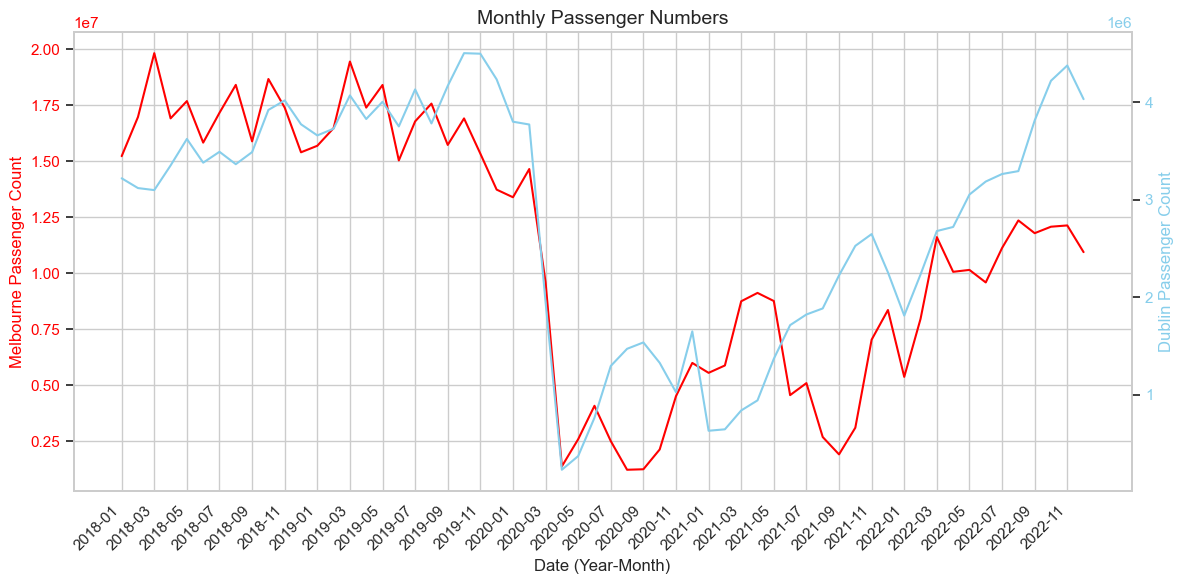

In [86]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Melbourne data 
ax1.plot(Month_df['Year'].astype(str) + '-' + Month_df['Month'].astype(str), Month_df['Melbourne'], label='Melbourne', color='red')
ax1.set_xlabel('Date (Year-Month)')
ax1.set_ylabel('Melbourne Passenger Count', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('Monthly Passenger Numbers', size=14)

# Create a twin axis for Dublin 
ax2 = ax1.twinx()
ax2.plot(Month_df['Year'].astype(str) + '-' + Month_df['Month'].astype(str), Month_df['Dublin'], label='Dublin', color='skyblue')
ax2.set_ylabel('Dublin Passenger Count', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Customize x-axis ticks to show every 3 months
ticks = range(0, len(Month_df), 2)
ax1.set_xticks(ticks)
ax1.set_xticklabels(Month_df['Year'].astype(str).iloc[ticks] + '-' + Month_df['Month'].astype(str).iloc[ticks], rotation=45, ha='right')

# Show the plot
ax2.grid(False)
fig.tight_layout()
plt.show()

T-test

- Null Hypothesis: The mean passenger numbers in Melbourne and Dublin are equal.
- Alternative Hypothesis: The mean passenger numbers in Melbourne and Dublin are not equal.

In [87]:
# Extracting data
melbourne = Month_df[['Year', 'Month', 'Melbourne']]
dublin = Month_df[['Year', 'Month', 'Dublin']]

# Performing t-test
t_statistic, p_value = stats.ttest_rel(melbourne['Melbourne'], dublin['Dublin'])

# Displaying t-test result
print("T-test for Melbourne vs Dublin:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-test for Melbourne vs Dublin:
T-statistic: 13.400693540136555
P-value: 1.4929972747501846e-19


With a p-value of 0.001 (less than the typical significance level of 0.05), we reject the null hypothesis and conclude that there is a significant difference in mean passenger numbers between Melbourne and Dublin.

I also wanted to try a Kolmogorov-Smirnov test, which used to determine if two datasets are likely to come from the same underlying probability distribution.

In [88]:
# Perform Kolmogorov-Smirnov test
statistic, p_value = stats.ks_2samp(melbourne['Melbourne'], dublin['Dublin'])

# Choose significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The datasets do not follow the same pattern.")
else:
    print("Fail to reject the null hypothesis. The datasets follow the same pattern.")

Reject the null hypothesis. The datasets do not follow the same pattern.


#### Section 3.10: Average Passengers by Month

In [90]:
Mel_df = pd.read_csv('DS10) Melbourne Tram Users.csv')

In [91]:
# Data for Melbourne
#print(Mel_df.head())
print(Mel_df['Month_name'].unique())

Mel_Month = Mel_df.groupby('Month_name')['Pax_daily'].mean().reset_index()
print(Mel_Month)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
   Month_name      Pax_daily
0         Apr  410209.027778
1         Aug  335241.428571
2         Dec  364354.716981
3         Feb  443267.857143
4         Jan  395848.181818
5         Jul  358968.333333
6         Jun  334890.178571
7         Mar  432786.170213
8         May  377134.523810
9         Nov  382328.571429
10        Oct  382588.297872
11        Sep  330036.842105


In [92]:
Dub_df = pd.read_csv('D6) TOA11 - Luas Passenger Numbers.csv')
Dub_df = Dub_df[Dub_df['Statistic Label'] == 'All Luas lines']

#Dub_df

In [93]:
Dub_Month = Dub_df.groupby('Month')['VALUE'].mean().reset_index()
Dub_Month = Dub_Month[Dub_Month['Month'] != 'All months']
Dub_Month['Month'] = Dub_Month['Month'].str[:3]

# Display the merged DataFrame
print(Dub_Month)

   Month      VALUE
1    Apr  2213024.2
2    Aug  2757950.0
3    Dec  3187709.8
4    Feb  2698388.8
5    Jan  2623058.0
6    Jul  2799725.8
7    Jun  2557865.8
8    Mar  2526392.0
9    May  2482662.2
10   Nov  3312108.4
11   Oct  3298511.2
12   Sep  3044493.8


In [94]:
# Merge the dfs
Month = pd.merge(Dub_Month, Mel_Month, left_on='Month', right_on='Month_name')
Month = Month.drop('Month_name', axis=1)
Month = Month.rename(columns={'VALUE': 'Dublin', 'Pax_daily': 'Melbourne'})

Month

,Month,Dublin,Melbourne
0,Apr,2213024.2,410209.027778
1,Aug,2757950.0,335241.428571
2,Dec,3187709.8,364354.716981
3,Feb,2698388.8,443267.857143
4,Jan,2623058.0,395848.181818
5,Jul,2799725.8,358968.333333
6,Jun,2557865.8,334890.178571
7,Mar,2526392.0,432786.170213
8,May,2482662.2,377134.523810
9,Nov,3312108.4,382328.571429


In [95]:
Month

,Month,Dublin,Melbourne
0,Apr,2213024.2,410209.027778
1,Aug,2757950.0,335241.428571
2,Dec,3187709.8,364354.716981
3,Feb,2698388.8,443267.857143
4,Jan,2623058.0,395848.181818
5,Jul,2799725.8,358968.333333
6,Jun,2557865.8,334890.178571
7,Mar,2526392.0,432786.170213
8,May,2482662.2,377134.523810
9,Nov,3312108.4,382328.571429


In [96]:
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Month['Month'] = pd.Categorical(Month['Month'], categories = month_order, ordered=True)
Month = Month.sort_values('Month')

In [97]:
# Calculate percentage column
Month['Dublin %'] = (Month['Dublin'] / Month['Dublin'].sum()) * 100
Month['Melbourne %'] = (Month['Melbourne'] / Month['Melbourne'].sum()) * 100

# Display
print(Month)
print(Month['Dublin %'].sum())
print(Month['Melbourne %'].sum())

   Month     Dublin      Melbourne  Dublin %  Melbourne %
4    Jan  2623058.0  395848.181818  7.829582     8.704448
3    Feb  2698388.8  443267.857143  8.054438     9.747176
7    Mar  2526392.0  432786.170213  7.541043     9.516691
0    Apr  2213024.2  410209.027778  6.605670     9.020234
8    May  2482662.2  377134.523810  7.410514     8.292946
6    Jun  2557865.8  334890.178571  7.634990     7.364020
5    Jul  2799725.8  358968.333333  8.356919     7.893484
1    Aug  2757950.0  335241.428571  8.232222     7.371744
11   Sep  3044493.8  330036.842105  9.087528     7.257299
10   Oct  3298511.2  382588.297872  9.845747     8.412871
9    Nov  3312108.4  382328.571429  9.886333     8.407160
2    Dec  3187709.8  364354.716981  9.515015     8.011927
99.99999999999999
100.00000000000001


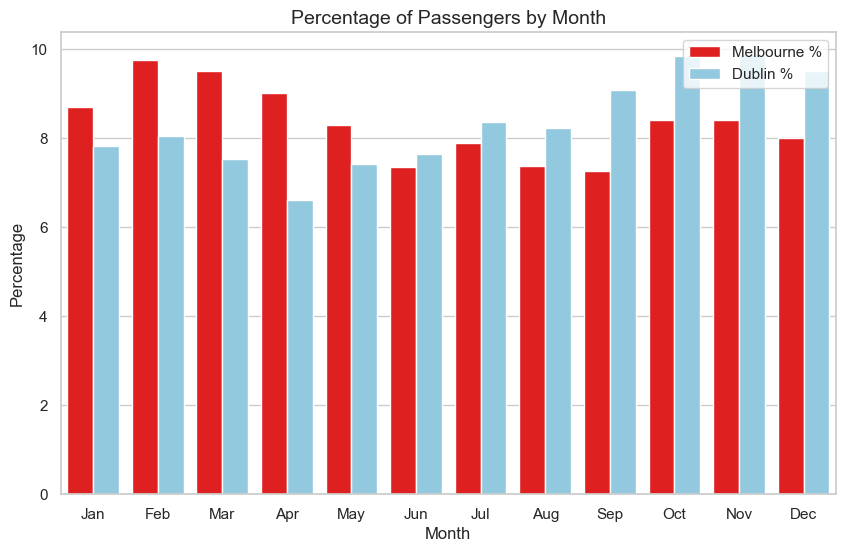

In [98]:
# Set the plotting style
sns.set(style="whitegrid")

# Define colours
custom_palette = {'Melbourne %': 'red', 'Dublin %': 'skyblue'}

# Reshape the df
melted_df = pd.melt(Month, id_vars=['Month'], value_vars=['Melbourne %', 'Dublin %'])

# Create a bar plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='value', hue='variable', data=melted_df, palette=custom_palette)

# Title and labels
plt.title('Percentage of Passengers by Month', size = 14)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.show()

#### Section 3.11 Reliability

Source: https://www.ptv.vic.gov.au/footer/data-and-reporting/track-record/

In [100]:
Mel_Time = pd.read_csv('DS13) Melbourne Timeliness.csv')
Dub_Time = pd.read_csv('DS5) TOA10 - Luas infrastructure.csv')
Dub_Time = Dub_Time[Dub_Time['Statistic Label'] == 'Timeliness (% services to timetable)']
Dub_Time = Dub_Time[['Year', 'Luas Line', 'VALUE']]

In [101]:
# Calculate the average for Melbourne
Mel_Time['% On time'] = Mel_Time['% On time'].str.rstrip('%').astype('float')
average_on_time = Mel_Time['% On time'].mean()
print("Melbourne Average % On time:", average_on_time)

Melbourne Average % On time: 80.79999999999998


In [102]:
# Separate the concatenated values
Dub_Time['VALUE'] = Dub_Time['VALUE'].str.extract('(\d+\.\d+)').astype('float')

# Calculate the average for Dublin
average_on_time = Dub_Time['VALUE'].mean()
print("Dublin Average % On time:", average_on_time)

Dublin Average % On time: 96.48100000000001


## Part 3) UN Tram and Light Rail Data

After performing additional reserach I found this UN dataset which details numberous light rail systems in multiple cities around the world. 

#### Section 3.12: Data Manipulation

Source: https://unece.org/tram-and-metro-data

In [114]:
# Read in data
UN_df = pd.read_csv('DS14) UN Tram Dataset.csv')
#UN_df

In [115]:
# Removing columns
UN_df = UN_df.drop(['Countrycode', 'Note'], axis=1)

In [116]:
print(UN_df.head())
print(UN_df['Variable'].unique())
print(UN_df['Value'].sum())

   City   Type Quarter Variable    Value
0  Baku  Metro  1Q2020     Pass  50855.0
1  Baku  Metro  2Q2020     Pass  13251.6
2  Baku  Metro  3Q2020     Pass   5502.4
3  Baku  Metro  4Q2020     Pass   5100.3
4  Baku  Metro  1Q2021     Pass      0.0
['Pass' 'PKM']
137891153.27300495


Some cities have multiple light rail systems, like Sofia for example, which has both a metro and a tram system. Therefore I have taken the decision to group by city. Alternatively, I could have filtered by only "Tram" systems but this reduces the dataset significantly. 

Also, I think it is a fair comparison to make as we are discussing inner city light rail transport. 

In [117]:
# Define the aggregation functions
aggregation_functions = {'Value': 'sum',}

# Group by 'City', 'Quarter', and 'Variable' and apply the aggregation functions
UN_df = UN_df.groupby(['City', 'Quarter', 'Variable'], as_index=False).agg(aggregation_functions)

# Alternatively, only include tram systems
#UN_df = UN_df[UN_df['Type'] == 'Tram']

# Display
print(UN_df)
print(UN_df.shape)
print(UN_df['Variable'].unique())
print(UN_df['Value'].sum())

                 City Quarter Variable    Value
0              Aarhus  1Q2018      PKM   2000.0
1              Aarhus  1Q2018     Pass    683.0
2              Aarhus  1Q2019      PKM   7000.0
3              Aarhus  1Q2019     Pass   1156.0
4              Aarhus  1Q2020      PKM  11000.0
...               ...     ...      ...      ...
2091  Zhytomyr region  3Q2021      PKM   3430.3
2092  Zhytomyr region  3Q2021     Pass   1225.1
2093  Zhytomyr region  4Q2019     Pass   1782.7
2094  Zhytomyr region  4Q2020      PKM   3765.1
2095  Zhytomyr region  4Q2020     Pass   1344.7

[2096 rows x 4 columns]
(2096, 4)
['PKM' 'Pass']
137891153.27300495


In [118]:
# Alternatively, only include tram systems
#UN_df = UN_df[UN_df['Type'] == 'Tram']

# Display
#print(UN_df)
#print(UN_df.shape)
#print(UN_df['Variable'].unique())
#print(UN_df['Value'].sum())

In [119]:
# Split the df into 2
pass_df = UN_df[UN_df['Variable'] == 'Pass']
pkm_df = UN_df[UN_df['Variable'] == 'PKM']

#### Section 3.13: Passenger Volumes Dashboard

In [120]:
# Tidying df
pass_df = pass_df.drop('Variable', axis=1)
pass_df = pass_df.rename(columns={'Value': 'No. of Passengers'})
pass_df['No. of Passengers'] = pass_df['No. of Passengers'] * 1000

# Editing the Quarter column
pass_df['Quarter'] = pass_df['Quarter'].str.replace(r'(\d)Q(\d{4})', r'Q\1 \2')

C:\Users\cathalnugent\AppData\Local\Temp\ipykernel_8516\588412643.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



In [121]:
#pass_df

In [122]:
# Initialize
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Passenger Volumes", style={'font-family': 'Arial, sans-serif'}),
    
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': city, 'value': city} for city in pass_df['City'].unique()],
        value=pass_df['City'].unique()[0],
        multi=False,
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='passenger-chart'),
])

# Define callback to update the chart
@app.callback(
    dash.dependencies.Output('passenger-chart', 'figure'),
    [dash.dependencies.Input('city-dropdown', 'value')]
)
def update_chart(selected_city):
    filtered_df = pass_df[pass_df['City'] == selected_city]
    
    figure = {
        'data': [
            {'x': filtered_df['Quarter'], 'y': filtered_df['No. of Passengers'], 'type': 'bar', 'name': 'Passengers'},
        ],
        'layout': {
            'title': f'Passenger Volumnes for {selected_city}',
            'xaxis': {'title': 'Quarter'},
            'yaxis': {'title': 'No. of Passengers'},
        }
    }
    return figure

# Run
if __name__ == '__main__':
    app.run_server(debug=True)

I like the above dashboard but I wanted to enhance it in order to compare different cities, so I wanted to create a second dash with this ability.

In [123]:
# Initialise the app
app2 = dash.Dash(__name__)

# Define the layout 
app2.layout = html.Div([
    html.H1("Passenger Volumes", style={'font-family': 'Arial, sans-serif'}),
    
    dcc.Dropdown(
        id='city-dropdown2',
        options=[{'label': city, 'value': city} for city in pass_df['City'].unique()],
        value=['Dublin'],  # Set Dublin as default
        multi=True,
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='passenger-chart2'),
])

# Define callback 
@app2.callback(
    dash.dependencies.Output('passenger-chart2', 'figure'),
    [dash.dependencies.Input('city-dropdown2', 'value')]
)
def update_chart2(selected_cities):
    if not selected_cities:
        figure = {
            'data': [],
            'layout': {
                'title': 'Passenger Volumes (App 2)',
                'xaxis': {'title': 'Quarter'},
                'yaxis': {'title': 'No. of Passengers'},
            }
        }
    else:
        traces = []
        for city in selected_cities:
            filtered_df = pass_df[pass_df['City'] == city]
            trace = {'x': filtered_df['Quarter'], 'y': filtered_df['No. of Passengers'], 'type': 'scatter', 'name': city}
            traces.append(trace)

        figure = {
            'data': traces,
            'layout': {
                'title': f'Passenger Volumes for {", ".join(selected_cities)}',
                'xaxis': {'title': 'Quarter'},
                'yaxis': {'title': 'No. of Passengers'},
            }
        }
    return figure

# Run
if __name__ == '__main__':
    app2.run_server(debug=True, port=8051)

#### Section 3.14: Passenger Volumes Welch's t-test

In [124]:
Dublin_data  = pass_df[(pass_df['City'] == 'Dublin')]['No. of Passengers']
Tallinn_data = pass_df[(pass_df['City'] == 'Tallinn')]['No. of Passengers']

t_stat, p_value = ttest_ind(Dublin_data, Tallinn_data)

The ttest_ind function assumes that the two samples have the same length and are drawn from populations with the same variance. 

As our datasets have differing lengths, I have set the equal_var parameter to False in the ttest_ind function, which performs Welch's t-test. Welch's t-test is a modification of the t-test that does not assume equal variances or sample sizes.

In [125]:
# Extract data
Dublin_data = pass_df[(pass_df['City'] == 'Dublin')]['No. of Passengers']
Tallinn_data = pass_df[(pass_df['City'] == 'Tallinn')]['No. of Passengers']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(Dublin_data, Tallinn_data, equal_var=False)

# Display the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value <= alpha:
    print('Reject the null hypothesis. There is a significant difference.')
else:
    print('Fail to reject the null hypothesis. No significant difference.')

T-Statistic: -0.28028305730303077
P-Value: 0.7837283023792551
Fail to reject the null hypothesis. No significant difference.


#### Section 3.15: Passenger Kilometres Mann-Whitney test

In [126]:
#pkm_df

In [127]:
# Extract data 
Sofia_data = pkm_df[(pkm_df['City'] == 'Sofia')]['Value']
Tallin_data = pkm_df[(pkm_df['City'] == 'Tallinn')]['Value']

In [ ]:
# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(Sofia_data, Tallin_data)

In [128]:
# Display the results
print(f'U-Statistic: {u_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value <= alpha:
    print('Reject the null hypothesis. There is a significant difference.')
else:
    print('Fail to reject the null hypothesis. No significant difference.')

U-Statistic: 121.0
P-Value: 8.151536127743244e-05
Reject the null hypothesis. There is a significant difference.


The End